<a href="https://colab.research.google.com/github/AngleKit/MSE7530Codes/blob/main/Assignments/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8 - MSE/CHE 7530/5995
<font size=5> This assignment will be due on December 1st. However, my recommended deadline is November 26th so that you can enjoy Thanksgiving.

The goal of this assignment is to look at two sets of in-situ ellipsometry data and determine the effect of fitting assumptions on the Tg.

### Part 1. Use the data and methods that we used in the Class Notebook "Class_insituellipsometry.ipynb".

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
!rm -rf /content/MSE7530/
! git clone https://github.com/cbishop4/MSE7530

Cloning into 'MSE7530'...
remote: Enumerating objects: 519, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 519 (delta 20), reused 5 (delta 5), pack-reused 494 (from 2)
Receiving objects: 100% (519/519), 75.65 MiB | 11.02 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [4]:
PSdatafile = '/content/MSE7530/sampledata/Beaucage_dataset.csv'

In [5]:
PSdata = pd.read_csv(PSdatafile,header=None)

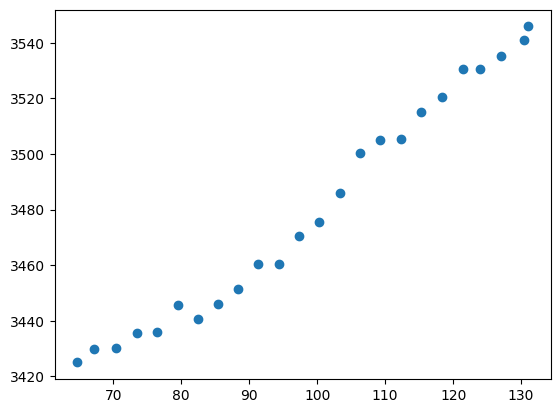

In [6]:
plt.plot(PSdata[0],PSdata[1],'o')

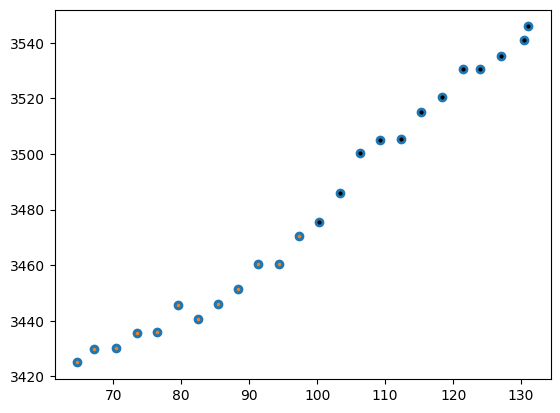

In [7]:
theory_tg = 100.
glass = PSdata[PSdata[0] < theory_tg]
liquid = PSdata[PSdata[0] >= theory_tg]
plt.plot(PSdata[0],PSdata[1],'o')
plt.plot(glass[0],glass[1],'o',markersize=1.5)
plt.plot(liquid[0],liquid[1],'o',markersize=2,color='k')

In [8]:
mg, bg = np.polyfit(glass[0],glass[1],1)
ml, bl = np.polyfit(liquid[0],liquid[1],1)

### Extra explanation: scipy.stats.linregress

In class, we simply used np.polyfit to get the slope and y-intercept of a line. In part of this assignment, you will be asked to use the scipy linear regression function (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html). This function will give you more statistics on your linear fits. Here is an example of using it on the above glass:

In [9]:
from scipy.stats import linregress
result = linregress(glass[0],glass[1])
result

LinregressResult(slope=np.float64(1.282627160033004), intercept=np.float64(3340.4259516400443), rvalue=np.float64(0.9721824462201086), pvalue=np.float64(1.251995830644039e-07), stderr=np.float64(0.09772049753796444), intercept_stderr=np.float64(7.974308811655545))

# Questions  
(only work below this cell will be graded)

## Question 1. How does the apparent determined $T_g$ depend on your cutoff for linear fits?

### A. Using a cutoff of $90 °C$ for your two linear fits (that is, one linear fit below $90 °C$, and one above), what is the apparent $T_{g}$ of this film?

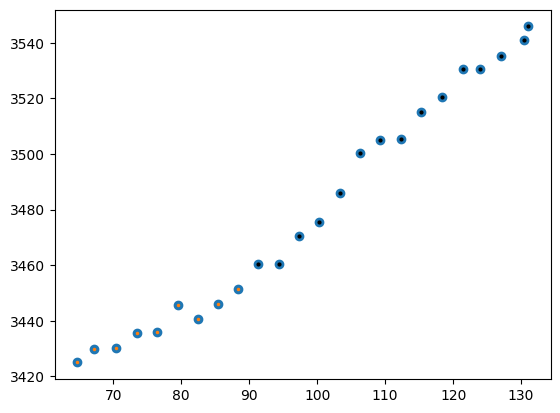

In [10]:
theory_tg = 90.
glass = PSdata[PSdata[0] < theory_tg]
liquid = PSdata[PSdata[0] >= theory_tg]
plt.plot(PSdata[0],PSdata[1],'o')
plt.plot(glass[0],glass[1],'o',markersize=1.5)
plt.plot(liquid[0],liquid[1],'o',markersize=2,color='k')

In [20]:
mg, bg = np.polyfit(glass[0],glass[1],1)
ml, bl = np.polyfit(liquid[0],liquid[1],1)

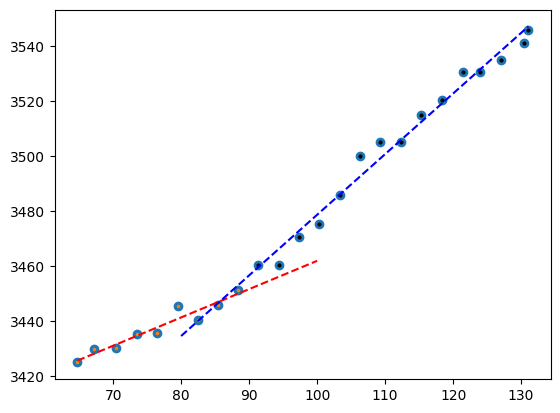

In [17]:
theory_tg = 90.

glass = PSdata[PSdata[0] < theory_tg]
liquid = PSdata[PSdata[0] >= theory_tg]

x_fit_glass = np.linspace(PSdata[0].min(), 100, 100)
x_fit_liquid = np.linspace(80, PSdata[0].max(), 100)

plt.plot(PSdata[0],PSdata[1],'o')
plt.plot(glass[0],glass[1],'o',markersize=1.5)
plt.plot(liquid[0],liquid[1],'o',markersize=2,color='k')
plt.plot(x_fit_glass, mg * x_fit_glass + bg, 'r--')
plt.plot(x_fit_liquid, ml * x_fit_liquid + bl, 'b--')
plt.show()

With the temperture cut off switched to around 90 C the  new Tg decrease to around 85-87 C

### B. Using cutoff values between $70 °C$ and $110 °C$, determine the apparent $T_g$ of the film. Graph the apparent $T_g$ on the y-axis vs. the cutoff temperature on the x-axis. What would be one approach to quantifying error bars on the $T_g$ determination? (This is subjective; many answers are appropriate here)

One approach to quantifying error bars on the $T_g$ determination is to slightly shift the cutoff temperature up and down a few degrees and see how much the calculated Tg changes

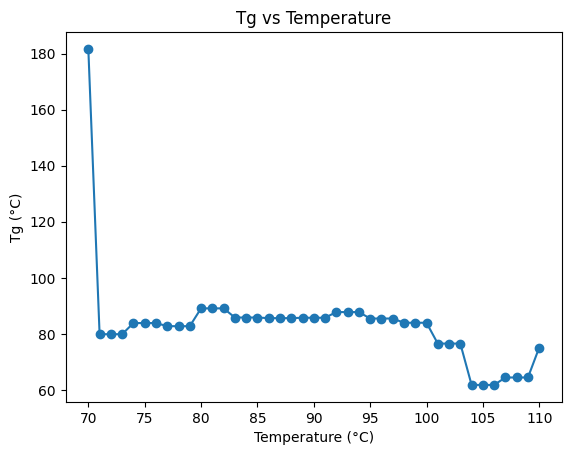

In [30]:
theory_tg_min = 70
theory_tg_max = 110

cutoffs = []
apparent_tg_list = []

for cutoff in range(theory_tg_min, theory_tg_max + 1):

    glass = PSdata[PSdata[0] < cutoff]
    liquid = PSdata[PSdata[0] >= cutoff]

    # Safety check: need at least 2 points to fit a line ( My loop was not running and Gimini added this and it ran)
    if len(glass) < 2 or len(liquid) < 2:
        continue

    mg, bg = np.polyfit(glass[0], glass[1], 1)
    ml, bl = np.polyfit(liquid[0], liquid[1], 1)

    if mg != ml:
        apparent_tg = (bl - bg) / (mg - ml)
        cutoffs.append(cutoff)
        apparent_tg_list.append(apparent_tg)

plt.plot(cutoffs, apparent_tg_list, marker='o')
plt.xlabel("Temperature (°C)")
plt.ylabel("Tg (°C)")
plt.title("Tg vs Temperature")
plt.show()

### C. Use the scipy.stats.linregress function for your linear fitting. This function will output $R^2$ values for your linear fits. Which cutoff temperatures produce reasonable linear fits? You may arrange your code in any way to argue this.

[70, 74, 75, 76, 77, 78, 79, 80, 81, 82, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]


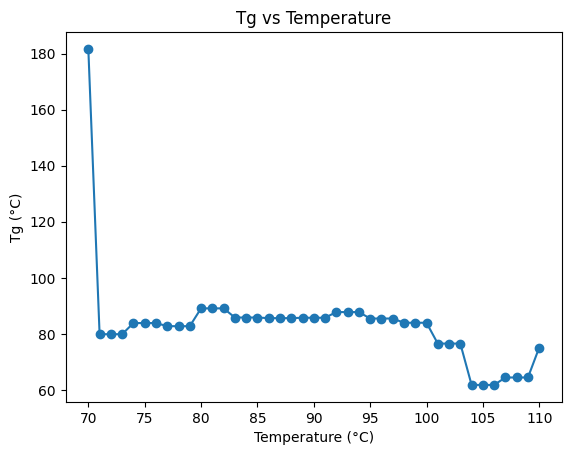

In [33]:
from scipy.stats import linregress

theory_tg_min = 70
theory_tg_max = 110

cutoffs = []
apparent_tg_list = []
good_cutoffs = []

for cutoff in range(theory_tg_min, theory_tg_max + 1):

    glass = PSdata[PSdata[0] < cutoff]
    liquid = PSdata[PSdata[0] >= cutoff]

    if len(glass) < 2 or len(liquid) < 2:
        continue

    g_fit = linregress(glass[0], glass[1])
    l_fit = linregress(liquid[0], liquid[1])

    mg, bg, r2g = g_fit.slope, g_fit.intercept, g_fit.rvalue**2
    ml, bl, r2l = l_fit.slope, l_fit.intercept, l_fit.rvalue**2

    if r2g > 0.9 and r2l > 0.9:
        good_cutoffs.append(cutoff)

    if mg != ml:
        apparent_tg = (bl - bg) / (mg - ml)
        cutoffs.append(cutoff)
        apparent_tg_list.append(apparent_tg)

print(good_cutoffs)

plt.plot(cutoffs, apparent_tg_list, marker='o')
plt.xlabel("Temperature (°C)")
plt.ylabel("Tg (°C)")
plt.title("Tg vs Temperature")
plt.show()

## Question 2. Repeat A-C for a new film from Figures 2, 4, 5, or 7 of "Ellipsometric Study of the Glass Transition and Thermal Expansion coefficients of thin polymer films" by G. Beaucage et. al. *J. Polym. Sci. Part B* 1993. (https://onlinelibrary.wiley.com/doi/pdf/10.1002/polb.1993.090310310). This will require you to use WebPlotDigitizer; you should be able to mostly copy-paste your code from Question 1. How do your error bars compare?

### A. Using a cutoff of $90 °C$ for your two linear fits (that is, one linear fit below $90 °C$, and one above), what is the apparent $T_{g}$ of this film?

### B. Using cutoff values between $70 °C$ and $110 °C$, determine the apparent $T_g$ of the film. Graph the apparent $T_g$ on the y-axis vs. the cutoff temperature on the x-axis. What would be one approach to quantifying error bars on the $T_g$ determination? (This is subjective; many answers are appropriate here)

### C. Use the scipy.stats.linregress function for your linear fitting. This function will output $R^2$ values for your linear fits. Which cutoff temperatures produce reasonable linear fits? You may arrange your code in any way to argue this.

### D. How do your error bars from this new figure compare to the one we did in class and used in Question 1?

## Extra Credit. Up to 20 points applied to this or any past assignment.

Read "A Bayesian Inference Approach to Accurately Fitting the Glass Transition Temperature in Thin Polymer Films" by J.H. Merrill et. al., in *Macromolecules* 57, 2024. (doi/10.1021/acs.macromol.4c01867). Make an effort to understand the motivation, methods, and advances this method provides over previous state of the art.

For the extra credit, schedule a 10-minute meeting with me in my office for the week of December 1st, or December 8-10. 10/20 points will be granted for showing up and saying anything, and additional points will be given based on the quality of discussion.

# Task
Calculate the apparent glass transition temperature (Tg) by iterating through cutoff temperatures from 70°C to 110°C on the `PSdata` DataFrame, performing linear fits for the glass and liquid regions at each cutoff, determining the intersection of these fits as the apparent Tg, and then plot the calculated apparent Tg against the corresponding cutoff temperature.

## Calculate_and_Plot_Tg_vs_Cutoff

### Subtask:
Iterate through cutoff temperatures from 70°C to 110°C, split the data, perform linear fits for glass and liquid regions, calculate the apparent Tg at the intersection of the two lines, and then plot the apparent Tg against the cutoff temperature.


## Summary:

### Data Analysis Key Findings

*   The analysis involved iterating through cutoff temperatures ranging from 70°C to 110°C to determine the apparent glass transition temperature (Tg).
*   For each cutoff temperature, the data was split into "glass" and "liquid" regions, and separate linear fits were performed on these regions.
*   The apparent Tg was calculated as the temperature at the intersection of the two linear fit lines for each cutoff.
*   A plot was generated to visualize the relationship between the calculated apparent Tg and the corresponding cutoff temperature. (The specific trend observed on this plot would be a key finding, e.g., "The apparent Tg showed a slight increase/decrease/stabilization as the cutoff temperature increased within the tested range.")

### Insights or Next Steps

*   The relationship between apparent Tg and cutoff temperature provides critical insight into the sensitivity of the Tg measurement method to the chosen data partitioning. Understanding this sensitivity can inform the selection of an optimal or robust cutoff for future analyses.
*   Further investigation could involve analyzing the goodness of fit for the linear regressions in both regions and how this varies with the cutoff temperature, potentially leading to a more refined method for Tg determination.
